# Orbits Using Lagrange's equation

Defines a two body orbit in Cartesian space

In [59]:
%matplotlib inline

In [60]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [61]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

In [62]:
class Orbit():
    
    """
    Orbit class solves the two-body problem for gravitational
    attraction between two bodies in Cartesian coordinates.
    
    Parameters
    ----------
    mass_1 : float
        mass of the first body
    mass_2 : float
        mass of the second body
    g : float
        the constant in the gravitational potential
        energy expression
        
    Methods
    -------
    du_dt(u,t)
        Returns the right-hand-side of the differential
        equation for the 8-component vector
        u = [x1, x2, y1, y2, x1_dot, x2_dot, y1_dot, y2_dot]
        for the time t.

    solve_ode(u, t_pts)
        Solves the differential equation for the initial
        conditions provided; returns an 8-component vector
        u for each time value in t_pts.    
    
    """
    
    def __init__(self, mass_1, mass_2, g):
        
        self.mass_1 = mass_1
        self.mass_2 = mass_2
        self.g = g
        
    def du_dt(self, u, t):
        
        """
        This function returns the right-hand side of the diffeq
        
        Parameters
        ----------
        u : float
            8-component vector of x and y coordinates (see
            above for full definition)
        t : float
            time
            
        """
        
        displacement = np.sqrt((u[1] - u[0])**2 + (u[3] - u[2])**2)
        const_1 = self.g/self.mass_1
        const_2 = self.g/self.mass_2
        dx = u[1] - u[0]
        dy = u[3] - u[2]
        
        x1_ddot = -const_2*dx*displacement**(-3)
        x2_ddot = const_1*dx*displacement**(-3)
        y1_ddot = -const_2*dy*displacement**(-3)
        y2_ddot = const_1*dy*displacement**(-3)
        
        return [u[4], u[5], u[6], u[7], x1_ddot, x2_ddot,
                y1_ddot, y2_ddot]
    
    def solve_ode(self, t_pts, u, abserr=1.0e-9, relerr=1.0e-9):
        
        """
        Solves the ode and returns the x- and y-positions.
        
        Returns
        -------
        position : float
            4-component matrix of the positions
            position = [x1, x2, y1, y2]
                
        """
        
        position = odeint(self.du_dt, u, t_pts,
                           atol=abserr, rtol=relerr).T
        
        return position        

In [63]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

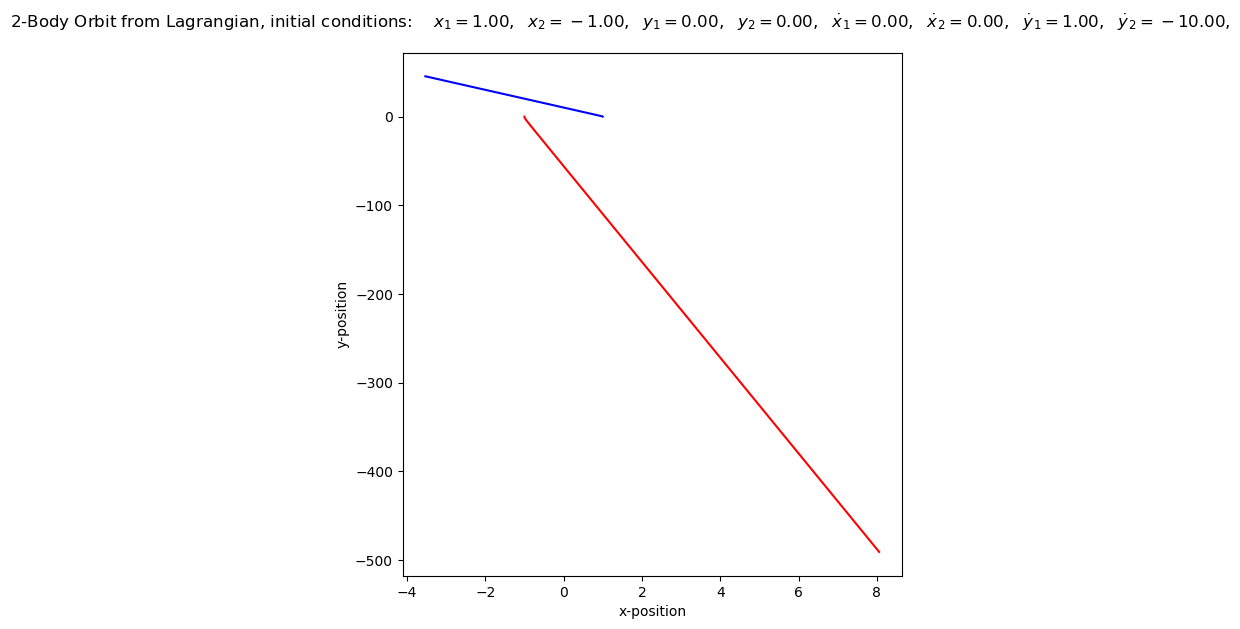

In [72]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.01
t_pts = np.arange(t_start, t_end+delta_t, delta_t)
start, stop = start_stop_indices(t_pts, t_start, t_end) 

mass_1 = 1.
mass_2 = 2.
g = -4.

orbit1 = Orbit(mass_1=mass_1, mass_2=mass_2, g=g)

# Initial conditions
x1_0 = 1.0
x2_0 = -1.0
y1_0 = 0.
y2_0 = 0.

x1_dot_0 = 0.
x2_dot_0 = 0.
y1_dot_0 = 1.
y2_dot_0 = -10.

u = np.array([x1_0, x2_0, y1_0, y1_0, x1_dot_0,
              x2_dot_0, y1_dot_0, y2_dot_0])

position = orbit1.solve_ode(t_pts, u)

fig = plt.figure(figsize=(6,6))
overall_title = '2-Body Orbit from Lagrangian, initial conditions:  ' + \
                rf'  $x_1 = {x1_0:.2f},$' + \
                rf'  $x_2 = {x2_0:.2f},$' + \
                rf'  $y_1 = {y1_0:.2f},$' + \
                rf'  $y_2 = {y2_0:.2f},$' + \
                rf'  $\dot x_1 = {x1_dot_0:.2f},$' + \
                rf'  $\dot x_2 = {x2_dot_0:.2f},$' + \
                rf'  $\dot y_1 = {y1_dot_0:.2f},$' + \
                rf'  $\dot y_2 = {y2_dot_0:.2f},$' + \
                '\n'
fig.suptitle(overall_title, va='baseline')

ax = fig.add_subplot(1,1,1)
ax.plot(position[0], position[2], color='blue')
ax.plot(position[1], position[3], color='red')
ax.set_xlabel('x-position')
ax.set_ylabel('y-position')

fig.tight_layout()


Text(0.5, 1.0, 'elliptical orbit')

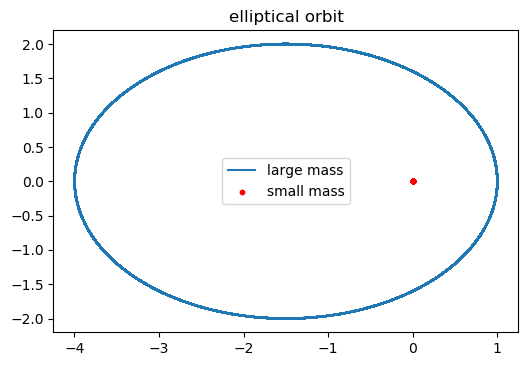

In [66]:
m1_new = 10000.
m2_new = 1.
g_new = -10.
orbit_new = Orbit(mass_1=m1_new, mass_2=m2_new, g=g_new)

t_start = 0.
t_end = 5000.
delta_t = 0.01
t_pts = np.arange(t_start, t_end+delta_t, delta_t)

x1_0_new = 1.0
x2_0_new = 0.0
y1_0_new = 0.0
y2_0_new = 0.0

x1_dot_0_new = 0.0
x2_dot_0_new = 0.0
y1_dot_0_new = 4.0
y2_dot_0_new = 0.0


u_new = np.array([x1_0_new, x2_0_new, y1_0_new, y2_0_new,
         x1_dot_0_new, x2_dot_0_new, y1_dot_0_new, y2_dot_0_new])

position_new = orbit_new.solve_ode(t_pts, u_new)

obit_fig = plt.figure()

ax = obit_fig.add_subplot(1,1,1)

ax.plot(position_new[0] - position_new[1],
         position_new[2] - position_new[3],
         label = 'large mass') 
ax.scatter(position_new[1] - position_new[1],
            position_new[3] - position_new[3],
            s=10, color='red', label = 'small mass')
ax.legend()
ax.set_title("elliptical orbit")
